In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [207]:
df=pd.read_csv('cars2.csv')

df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [208]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [209]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [210]:
#clean data
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [211]:
df=df.dropna()
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [212]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"


In [213]:
#remove $ from pruce column
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')

df['price'].astype(float)

df['milage']=df['milage'].str.replace('miles','')
df['milage']=df['milage'].str.replace('mi.','')
df['milage']=df['milage'].str.replace(',','')
df['milage'].astype(float)


df.head(10)

/var/folders/f0/8zss9bcx2pq3p607h6tvt1sr0000gn/T/ipykernel_26125/1714755650.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','')
/var/folders/f0/8zss9bcx2pq3p607h6tvt1sr0000gn/T/ipykernel_26125/1714755650.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['milage']=df['milage'].str.replace('mi.','')


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927
11,Aston,Martin DBS Superleggera,2019,22770,Gasoline,715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,184606
12,Toyota,Supra 3.0 Premium,2021,12500,Gasoline,382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Yellow,Black,None reported,Yes,53500
13,Lincoln,Aviator Reserve AWD,2022,18196,Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes,62000
15,Land,Rover LR4 HSE,2013,79800,Gasoline,375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,29990


In [214]:
#encode categorical data
df['brand'].unique()

df['brand'].value_counts()

from sklearn.preprocessing import LabelEncoder
brand_encoder=LabelEncoder()

df['brand']=brand_encoder.fit_transform(df['brand'])

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,14,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,19,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,20,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,3,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
7,4,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300


In [215]:
brand_encoder.classes_


array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
       'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
       'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land',
       'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'Rolls-Royce',
       'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota',
       'Volkswagen', 'Volvo', 'smart'], dtype=object)

In [216]:
#encode other classes
title_encoder=LabelEncoder()
title_encoder.fit(df['clean_title'])
df['clean_title']=title_encoder.fit_transform(df['clean_title'])

transmission_encoder=LabelEncoder()
transmission_encoder.fit(df['transmission'])
df['transmission']=transmission_encoder.fit_transform(df['transmission'])

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,14,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,7,Black,Black,At least 1 accident or damage reported,0,10300
1,19,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,20,Moonlight Cloud,Gray,At least 1 accident or damage reported,0,38005
3,20,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,13,Black,Black,None reported,0,15500
6,3,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7,Blue,Black,None reported,0,31000
7,4,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,24,Green,Green,None reported,0,7300


In [217]:
X=df[['brand','model_year','milage','transmission','clean_title']]
Y=df['price']

X

,brand,model_year,milage,transmission,clean_title
0,14,2013,51000,7,0
1,19,2021,34742,20,0
3,20,2015,88900,13,0
6,3,2017,84000,7,0
7,4,2001,242000,24,0
...,...,...,...,...,...
4003,34,2018,53705,24,0
4004,5,2023,714,21,0
4005,3,2022,10900,30,0
4007,14,2020,33000,24,0


In [218]:
Y

0        10300
1        38005
3        15500
6        31000
7         7300
         ...  
4003     25900
4004    349950
4005     53900
4007     62999
4008     40000
Name: price, Length: 3269, dtype: object

In [219]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=12)

In [220]:
X_train 

,brand,model_year,milage,transmission,clean_title
3632,15,2023,7500,0,0
3544,21,2007,56000,24,0
2352,40,2016,77945,24,0
2439,34,2018,69600,22,0
2489,32,2016,116500,8,0
...,...,...,...,...,...
2503,40,2022,13000,24,0
1660,0,2020,6900,22,0
1816,3,2016,71280,24,0
2142,15,2019,51300,7,0


In [221]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()

lr_model.fit(X_train,Y_train) #training using the training data

y_pred=lr_model.predict(X_test)

y_pred


array([  51860.73819033,   49138.27891575,   29247.30460407,
         53619.97639111,   65485.17683233,   50572.53111169,
         39552.72123467,   23193.52464496,   61519.50202838,
        -17808.23785858,  -13451.62490443,   55398.45353127,
         19648.58776612,   -1645.23097156,   79615.05816014,
         72923.58018748,    9859.8063172 ,   31133.19823567,
         22278.89011839,   40780.16889007,   56377.68300634,
         44705.48777317,   54147.10438064,   31827.88947643,
        -61462.23730009,   30155.19542832,   64067.4973635 ,
         67993.87549637,   62807.13444372,   50089.3107748 ,
        -14672.84556965,   39499.48082625,   23682.52538376,
         50026.87543563,   38445.09282132, -101162.35849301,
         13941.87163919,   74594.23118355,   64256.92218818,
         70123.63211812,   29512.62581457,   40318.03838357,
         43358.07211547,   29988.91574654,   60757.36146751,
         59245.75502629,   48602.02926004,   51232.71912665,
          6136.95262628,

In [222]:
#evaluate the model
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(Y_test,y_pred)
mse
# import math 
# x=math.sqrt(mse)
# x

12158096719.499763

In [223]:
score=lr_model.score(X_test,Y_test)
print(f'Model score: {score*100:.2f} %')


Model score: 4.56 %


In [224]:
prediction=lr_model.predict([[4,2023,100,24,0]])
prediction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71685.64549046])

In [225]:
#support vector regression
from sklearn.svm import SVR


svr_model=SVR()
svr_model.fit(X_train,Y_train)

y_pred_svr=svr_model.predict(X_test)

mse_svr=mean_squared_error(Y_test,y_pred_svr)
print(mse_svr)
svr_score=svr_model.score(X_test,Y_test)
print(f'Model score: {svr_score*100:.2f} %')


12987111336.889648
Model score: -1.95 %


<Axes: >

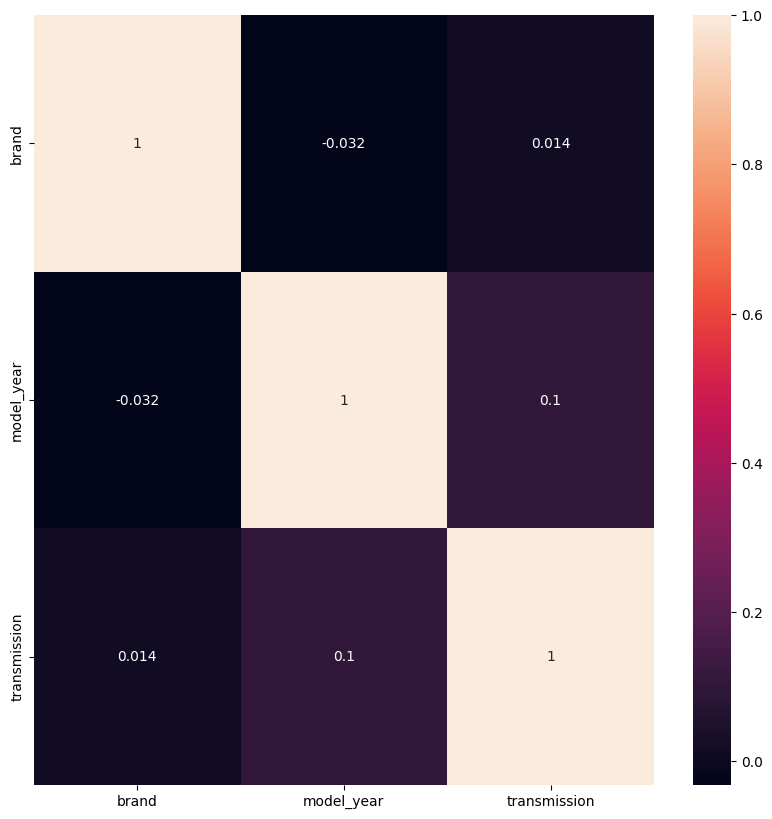

In [226]:
#correlation matrix
my_data=df.drop(['clean_title'],axis=1)
my_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_data.corr(),annot=True)

In [227]:
#confusion matrix for classification
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets